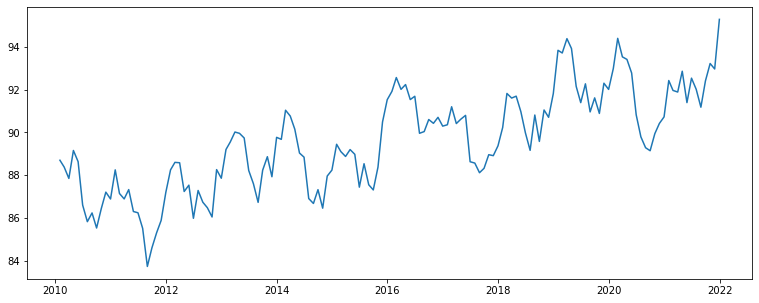

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_time = "1/1/2010"  # 数据起始时间
x_len = 144               # 数据长度
x = pd.to_datetime(pd.date_range(start=start_time, periods=x_len, freq='M'))

def fourier(sin_arg, cos_arg):
    y = np.zeros(x_len)
    z = np.zeros(x_len)
    for n in range(len(sin_arg)):
        y += sin_arg[n]*np.sin(np.array([i for i in range(x_len)])*np.pi/(6*(n+1)))
    for n in range(len(cos_arg)):
        z += cos_arg[n]*np.cos(np.array([i for i in range(x_len)])*np.pi/(6*(n+1)))
    return y + z

def linear(slope):
    y = np.array([slope*i for i in range(x_len)])
    return y

def noise(alpha):
    y = alpha*np.random.rand(x_len)
    return y

y = fourier([1,0.2,0.8],[1,0.2,0.8]) + linear(0.05) + noise(2) + 85

#plt.grid(axis='x')
plt.figure(figsize=(13, 5))
plt.plot(x,y)
plt.show()

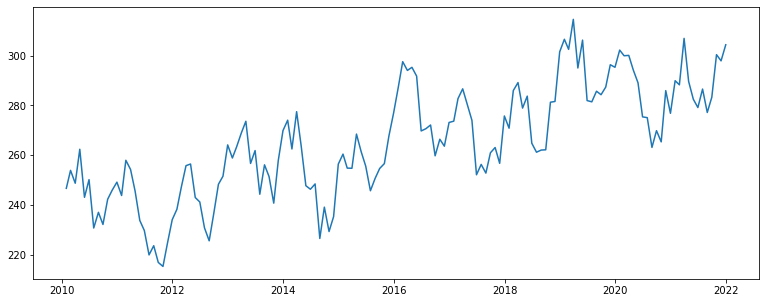

In [2]:
z = fourier([10,2,8],[10,2,8]) + linear(0.5) + noise(20) + 220

plt.figure(figsize=(13, 5))
plt.plot(x,z)
plt.show()

In [3]:
data = {'time':x.strftime('%Y/%m'),'consume':z}

data_df = pd.DataFrame(data)
#data_df.columns = ['time','consume']

writer = pd.ExcelWriter('../data/generate_temp.xlsx')
data_df.to_excel(writer,float_format='%.5f',index=False,sheet_name='warship_generate')
writer.save()